## **Machine Learning Algorithms ➡ Continent categorization**

In [114]:
!curl https://raw.githubusercontent.com/Angelaruizalvarez/Mental-Health-ML-Algorithms/main/df_continents.csv > df_continents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10311  100 10311    0     0  49483      0 --:--:-- --:--:-- --:--:-- 49572


## Classification Algorithms

We used different classification algorithms for the continents database, further plotting all the results and evaluating their accuracy. We plot two different mental health disorders against each other, mapping every single % of population for each year in all the time span for the 4 different continents + European Union, each represented by a colour described in the legend. All combinations are shown in this section.

In [115]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

dfc = pd.read_csv("df_continents.csv").dropna()

# Group by continent all the years making the mean of the % values for each disorder
dfc_grouped = dfc.groupby("Code").mean(numeric_only=True).reset_index()

# List of mental health disorders
disorders = [
    "Schizophrenia disorders",
    "Depressive disorders",
    "Anxiety disorders",
    "Bipolar disorders",
    "Eating disorders",
]

# All possible combinations
combinations_of_disorders = list(combinations(disorders, 2))


⚠ Uncomment for different options:
- Use all the values for each year
- Use a mean value of all the years

In [116]:
# Change continent codes into numbers with Label Encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dfc["Code"]) #all year values
#y = label_encoder.fit_transform(dfc_grouped["Code"]) #mean values

ddbb = dfc  #all year values
#ddbb = dfc_grouped #mean values

# Uncomment for different options

### Logistic Regression


<Figure size 1500x1200 with 0 Axes>

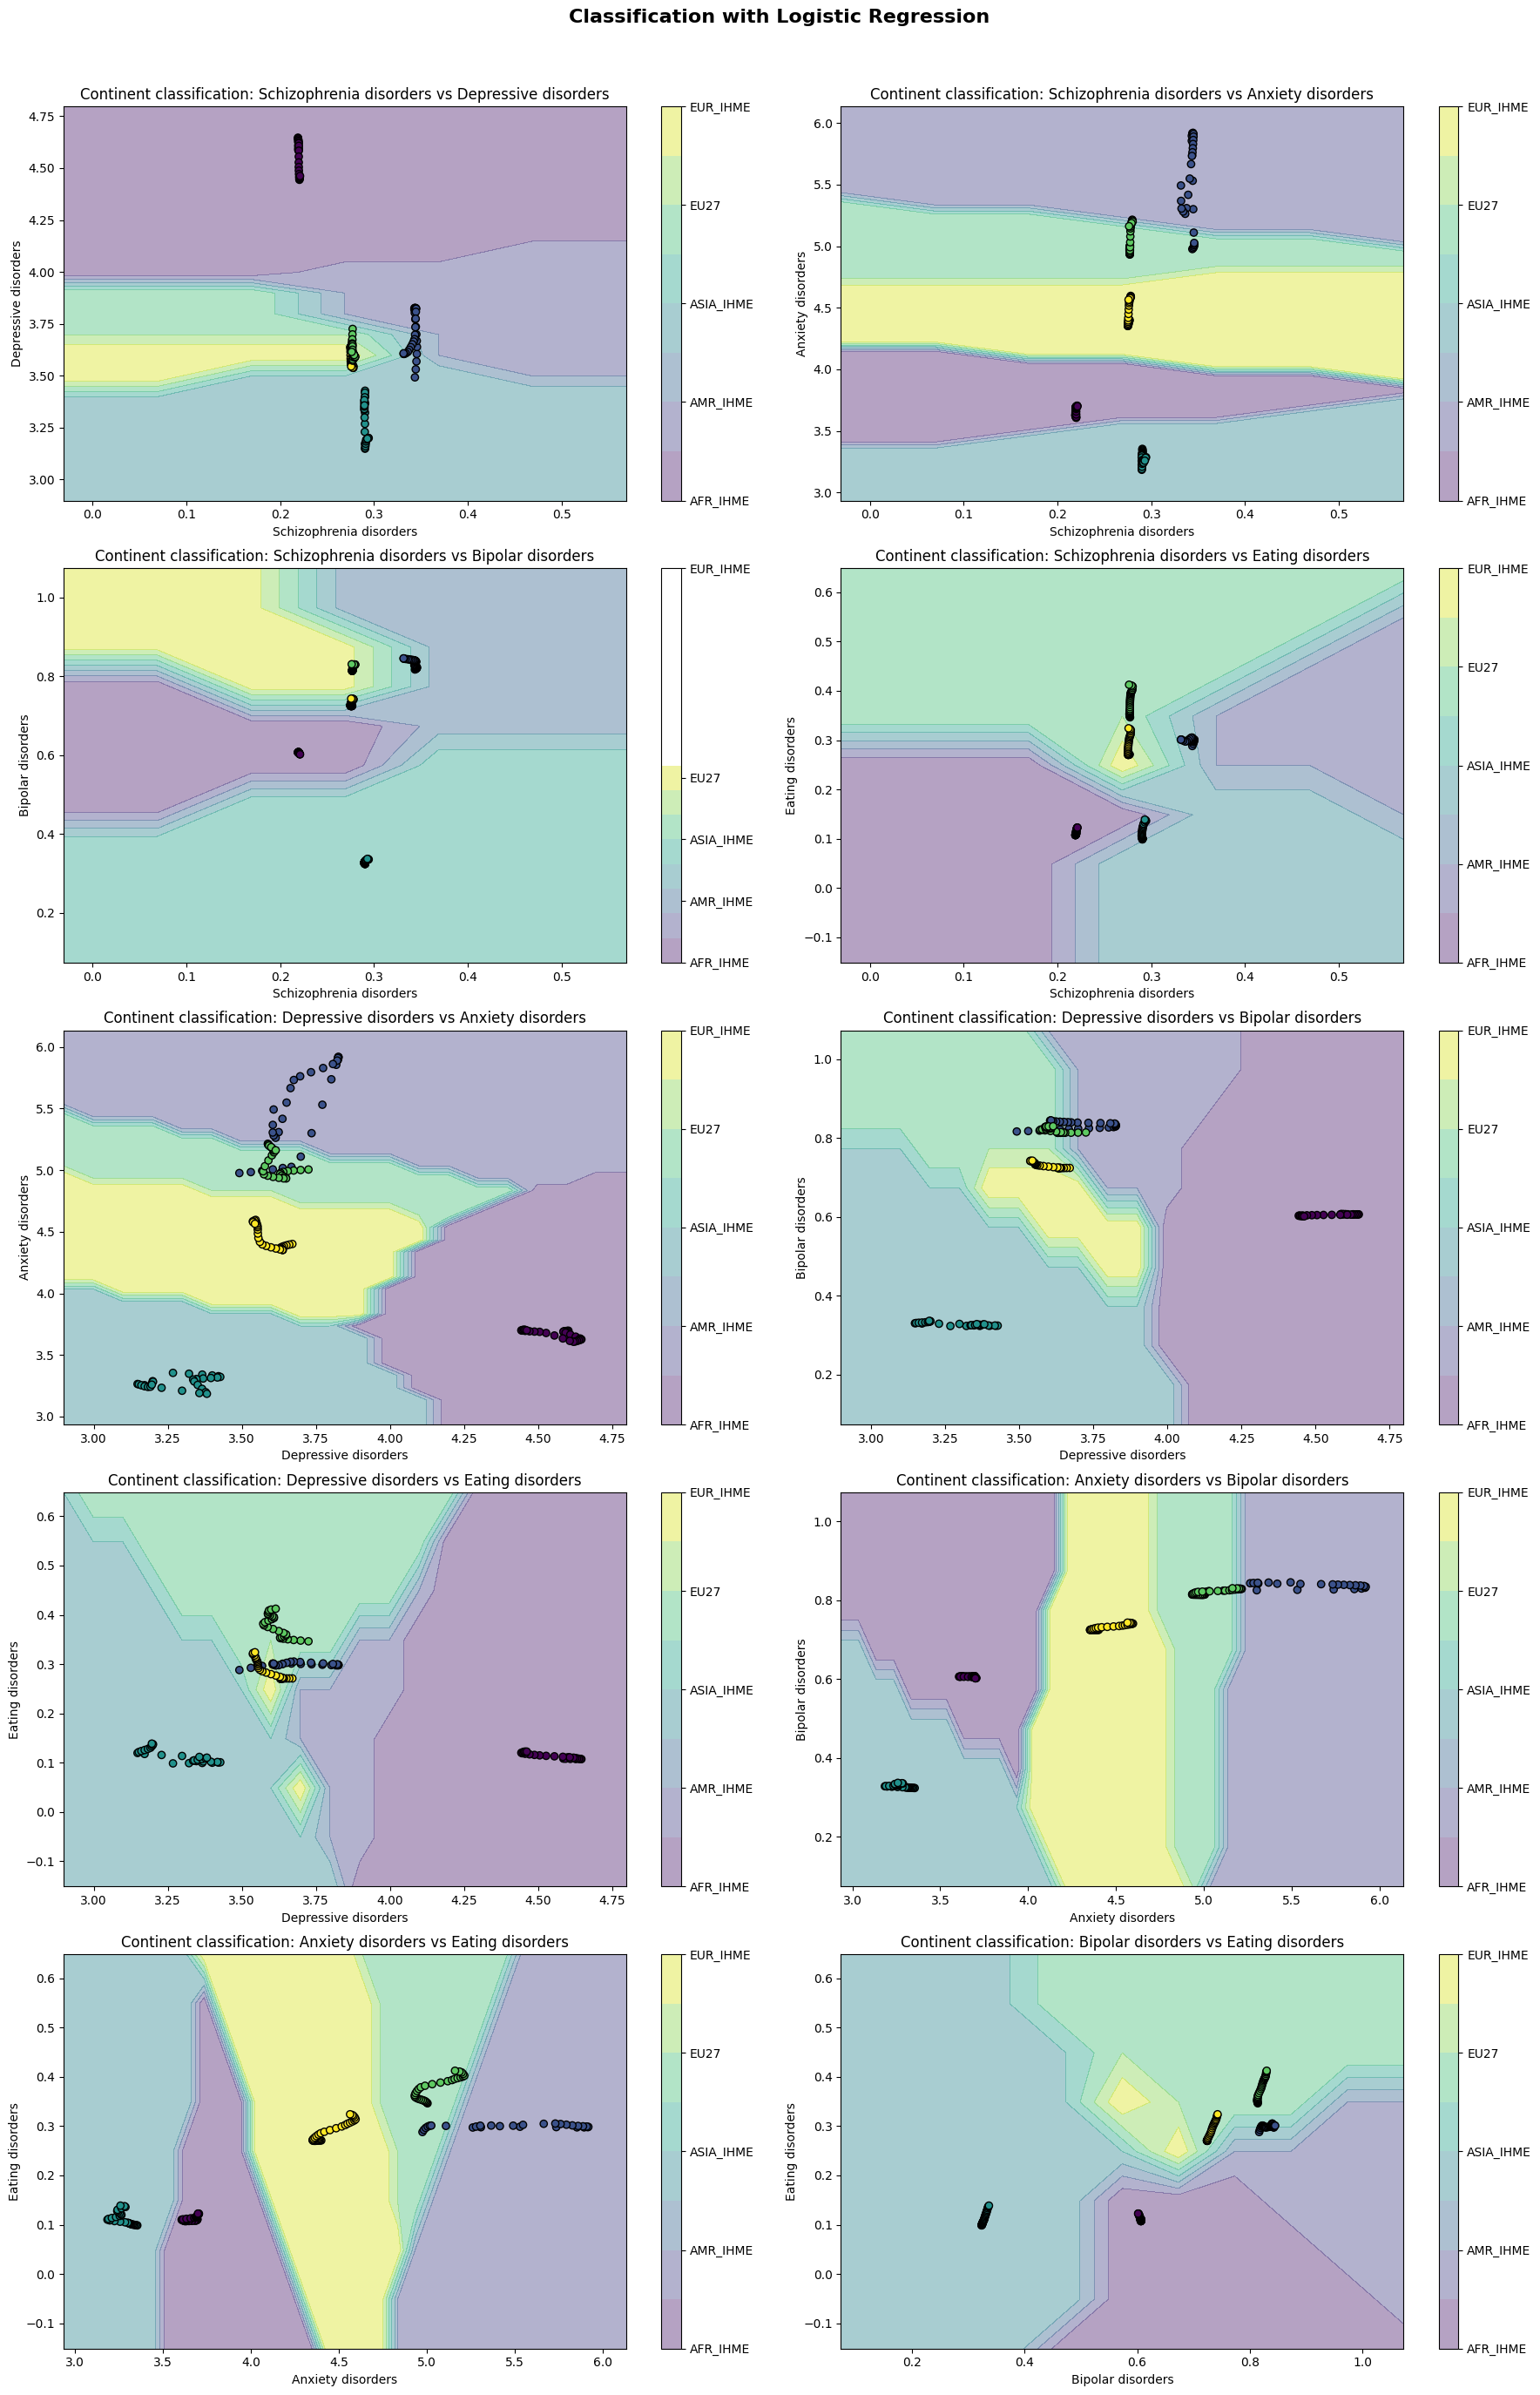

In [117]:
from sklearn.linear_model import LogisticRegression

# Create figure for subgraphs
plt.figure(figsize=(15, 12)) # graphs are very small with this size/proportion
plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)  # subgraphs 5x2 (as we have 10 combinations)

    # We select 2 of them as characteristics of the model
    X = ddbb[[disorder1, disorder2]].values

    # Logistic Regression Model Training (using all the values from different years)
    model = LogisticRegression(solver="lbfgs", max_iter=1000)
    model.fit(X, y)  # Usamos la versión codificada de y

    # Decission regions
    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class on each point -> for colouring of the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decission regions
    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Continent classification: {disorder1} vs {disorder2}")

    # Legend
    continent_codes = label_encoder.classes_  # Mapping coded labels to original continent codes
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(continent_codes) - 1, len(continent_codes)))
    cbar.set_ticklabels(continent_codes)

# Title for all the graphs in general
plt.suptitle('Classification with Logistic Regression', fontsize=16, fontweight='bold')

# some adjustments for a clearer plotting
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


### Decision Tree

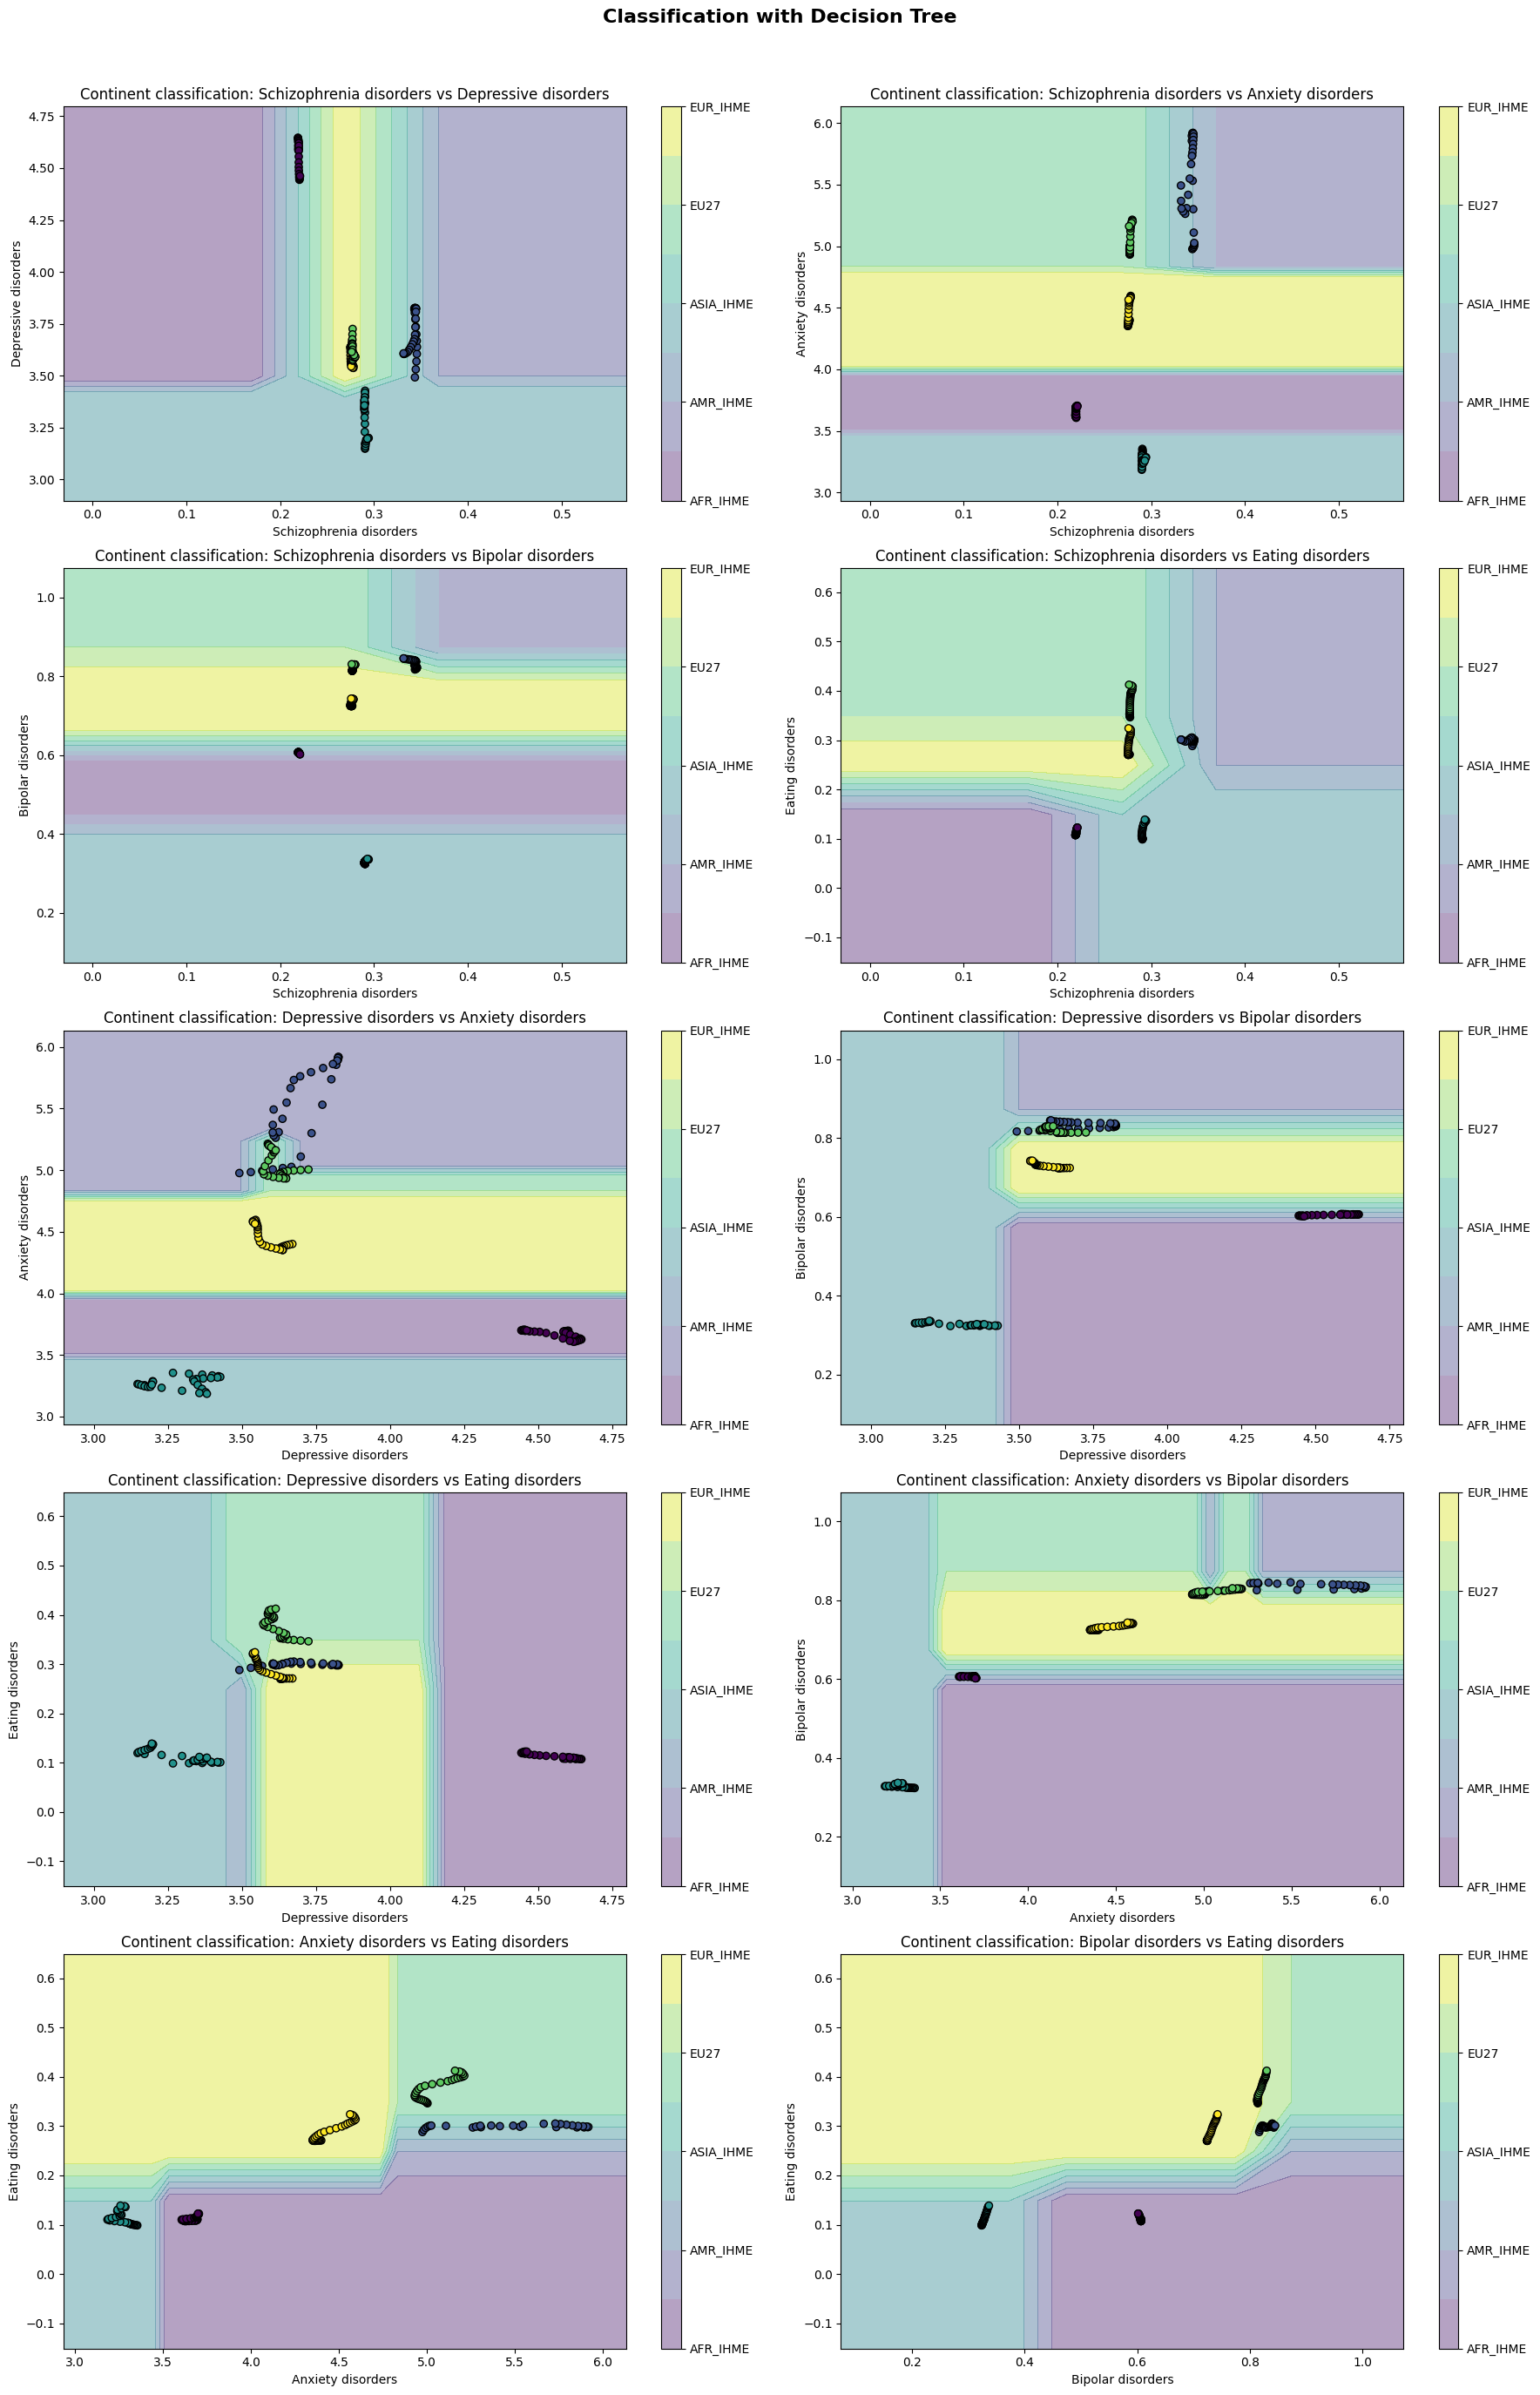

In [118]:
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # Decission Tree Model Training
    model = DecisionTreeClassifier()
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Continent classification: {disorder1} vs {disorder2}")

    continent_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(continent_codes) - 1, len(continent_codes)))
    cbar.set_ticklabels(continent_codes)

plt.suptitle('Classification with Decision Tree', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### Random Forest

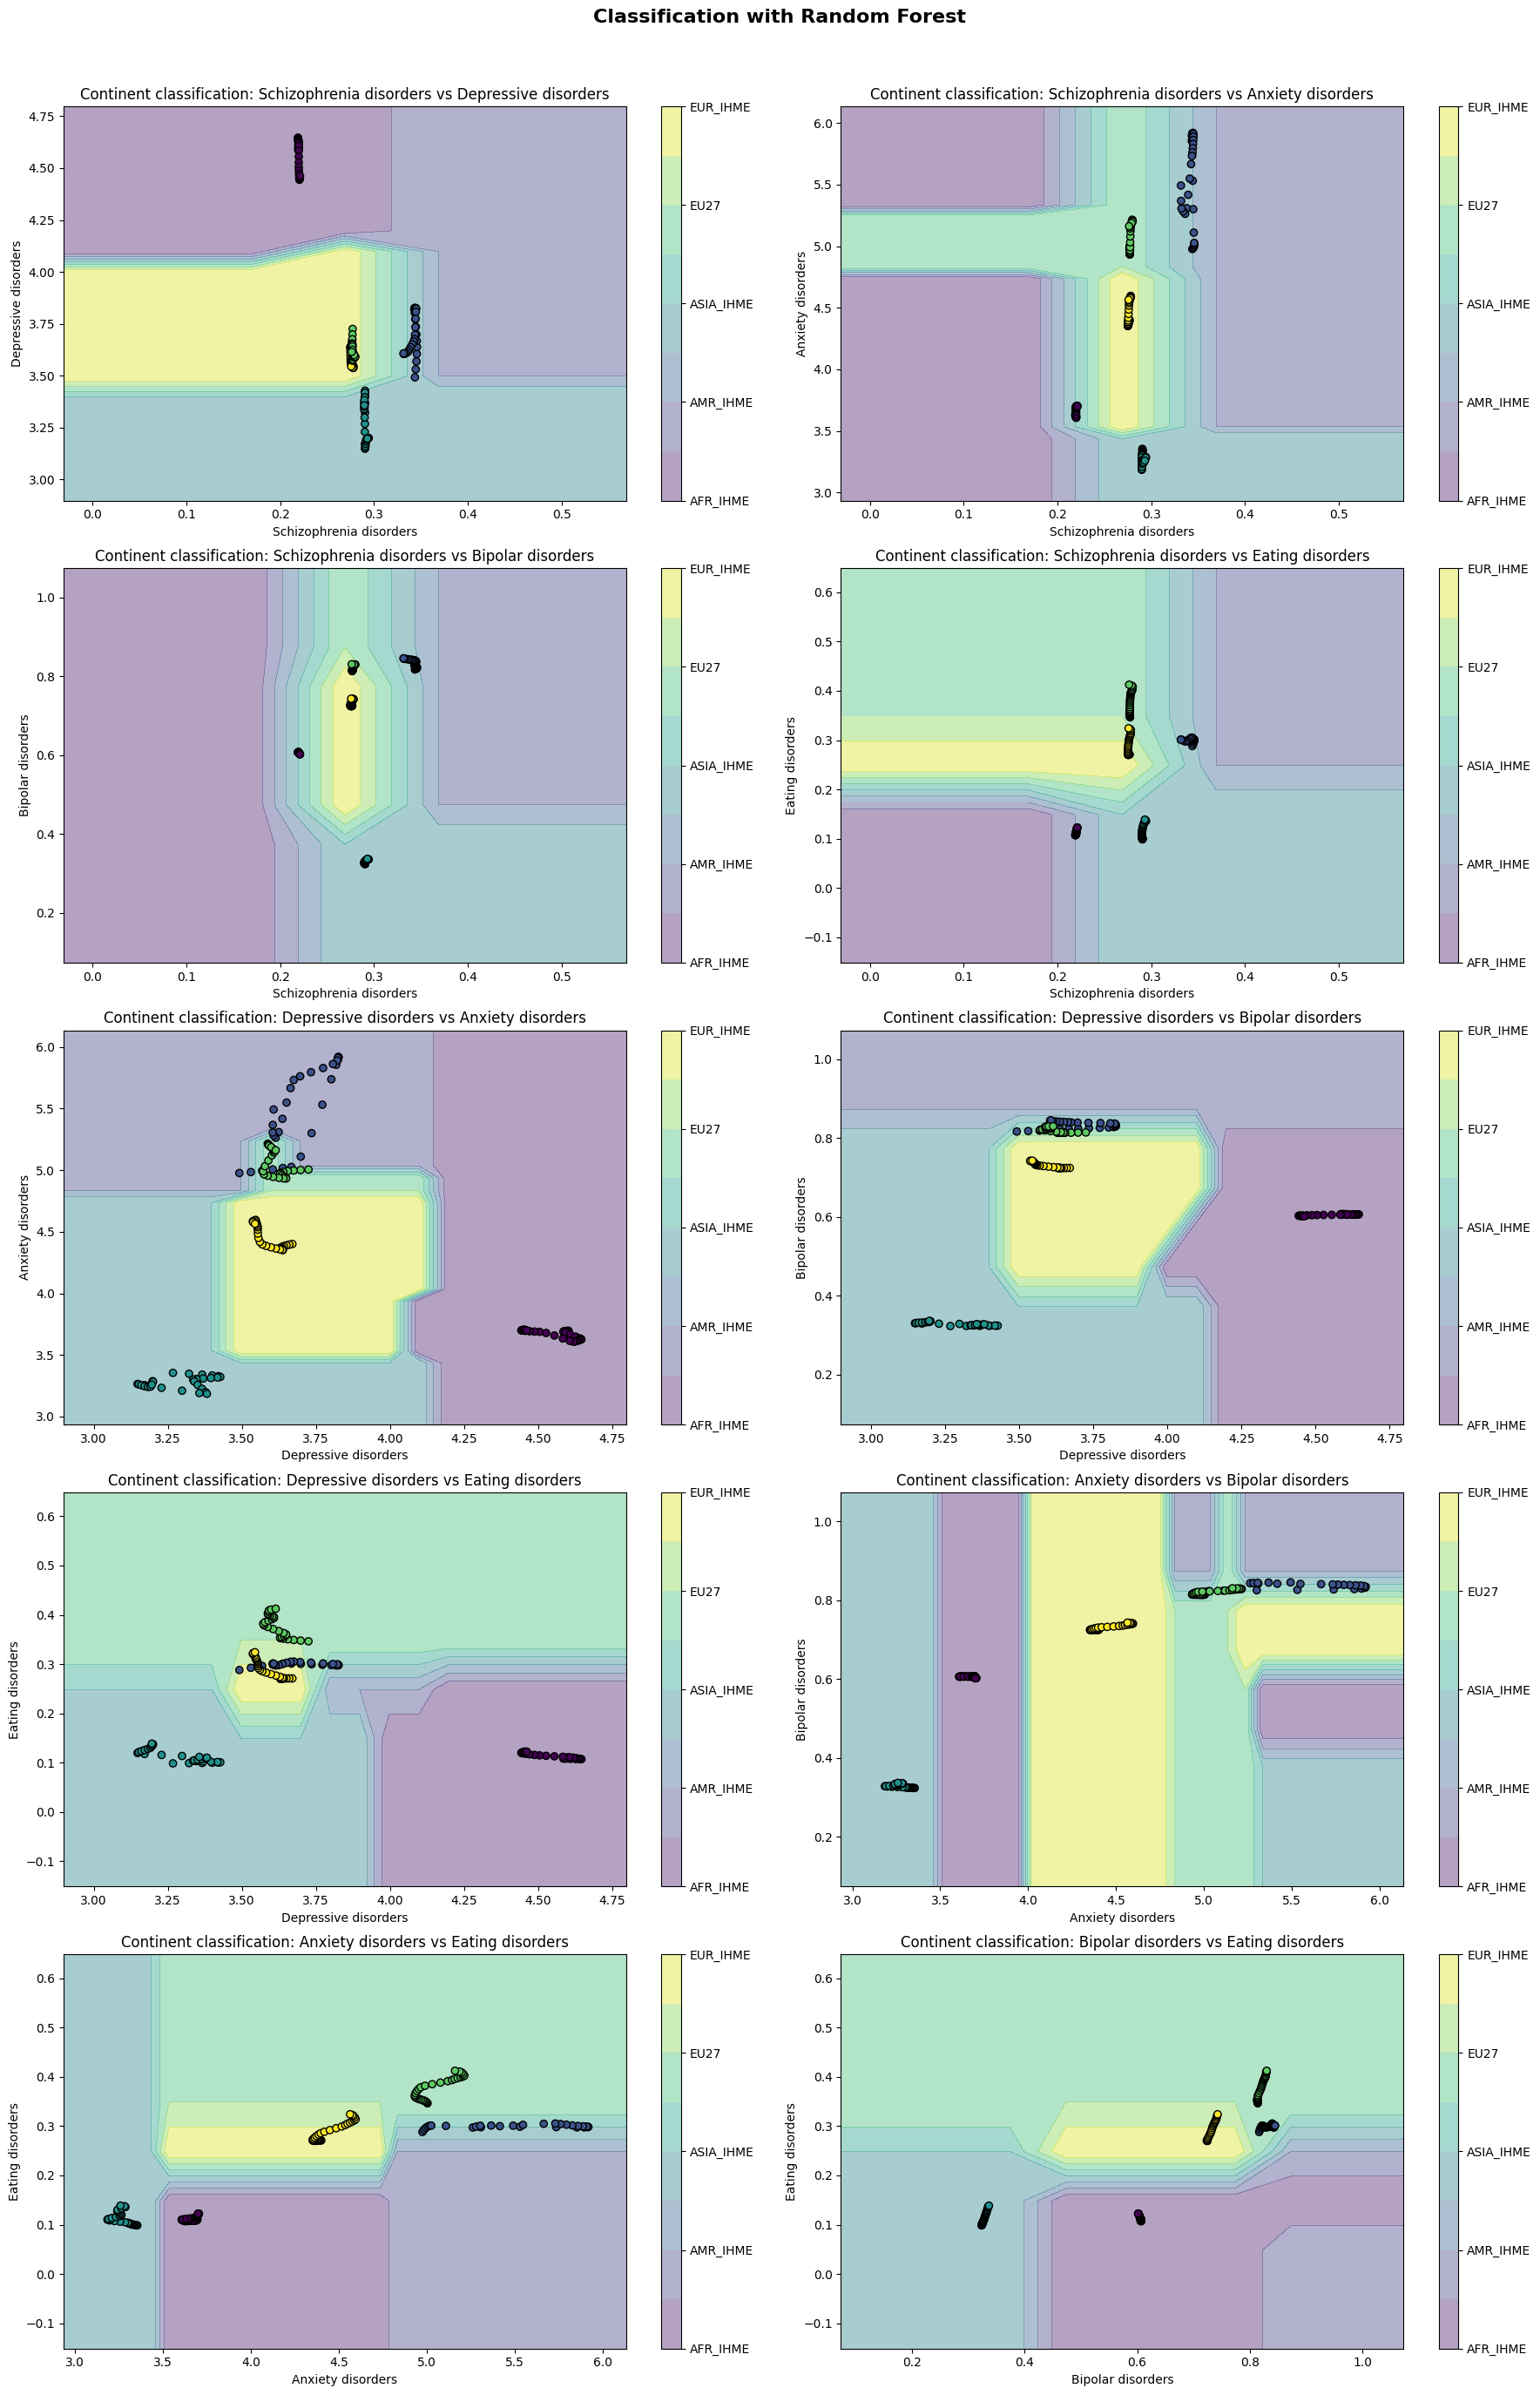

In [119]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # Random Forest Model Training
    model = RandomForestClassifier(n_estimators=100) # estimator como el profe MIRAR
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Continent classification: {disorder1} vs {disorder2}")

    continent_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(continent_codes) - 1, len(continent_codes)))
    cbar.set_ticklabels(continent_codes)

plt.suptitle('Classification with Random Forest', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### K Nearest Neighbour

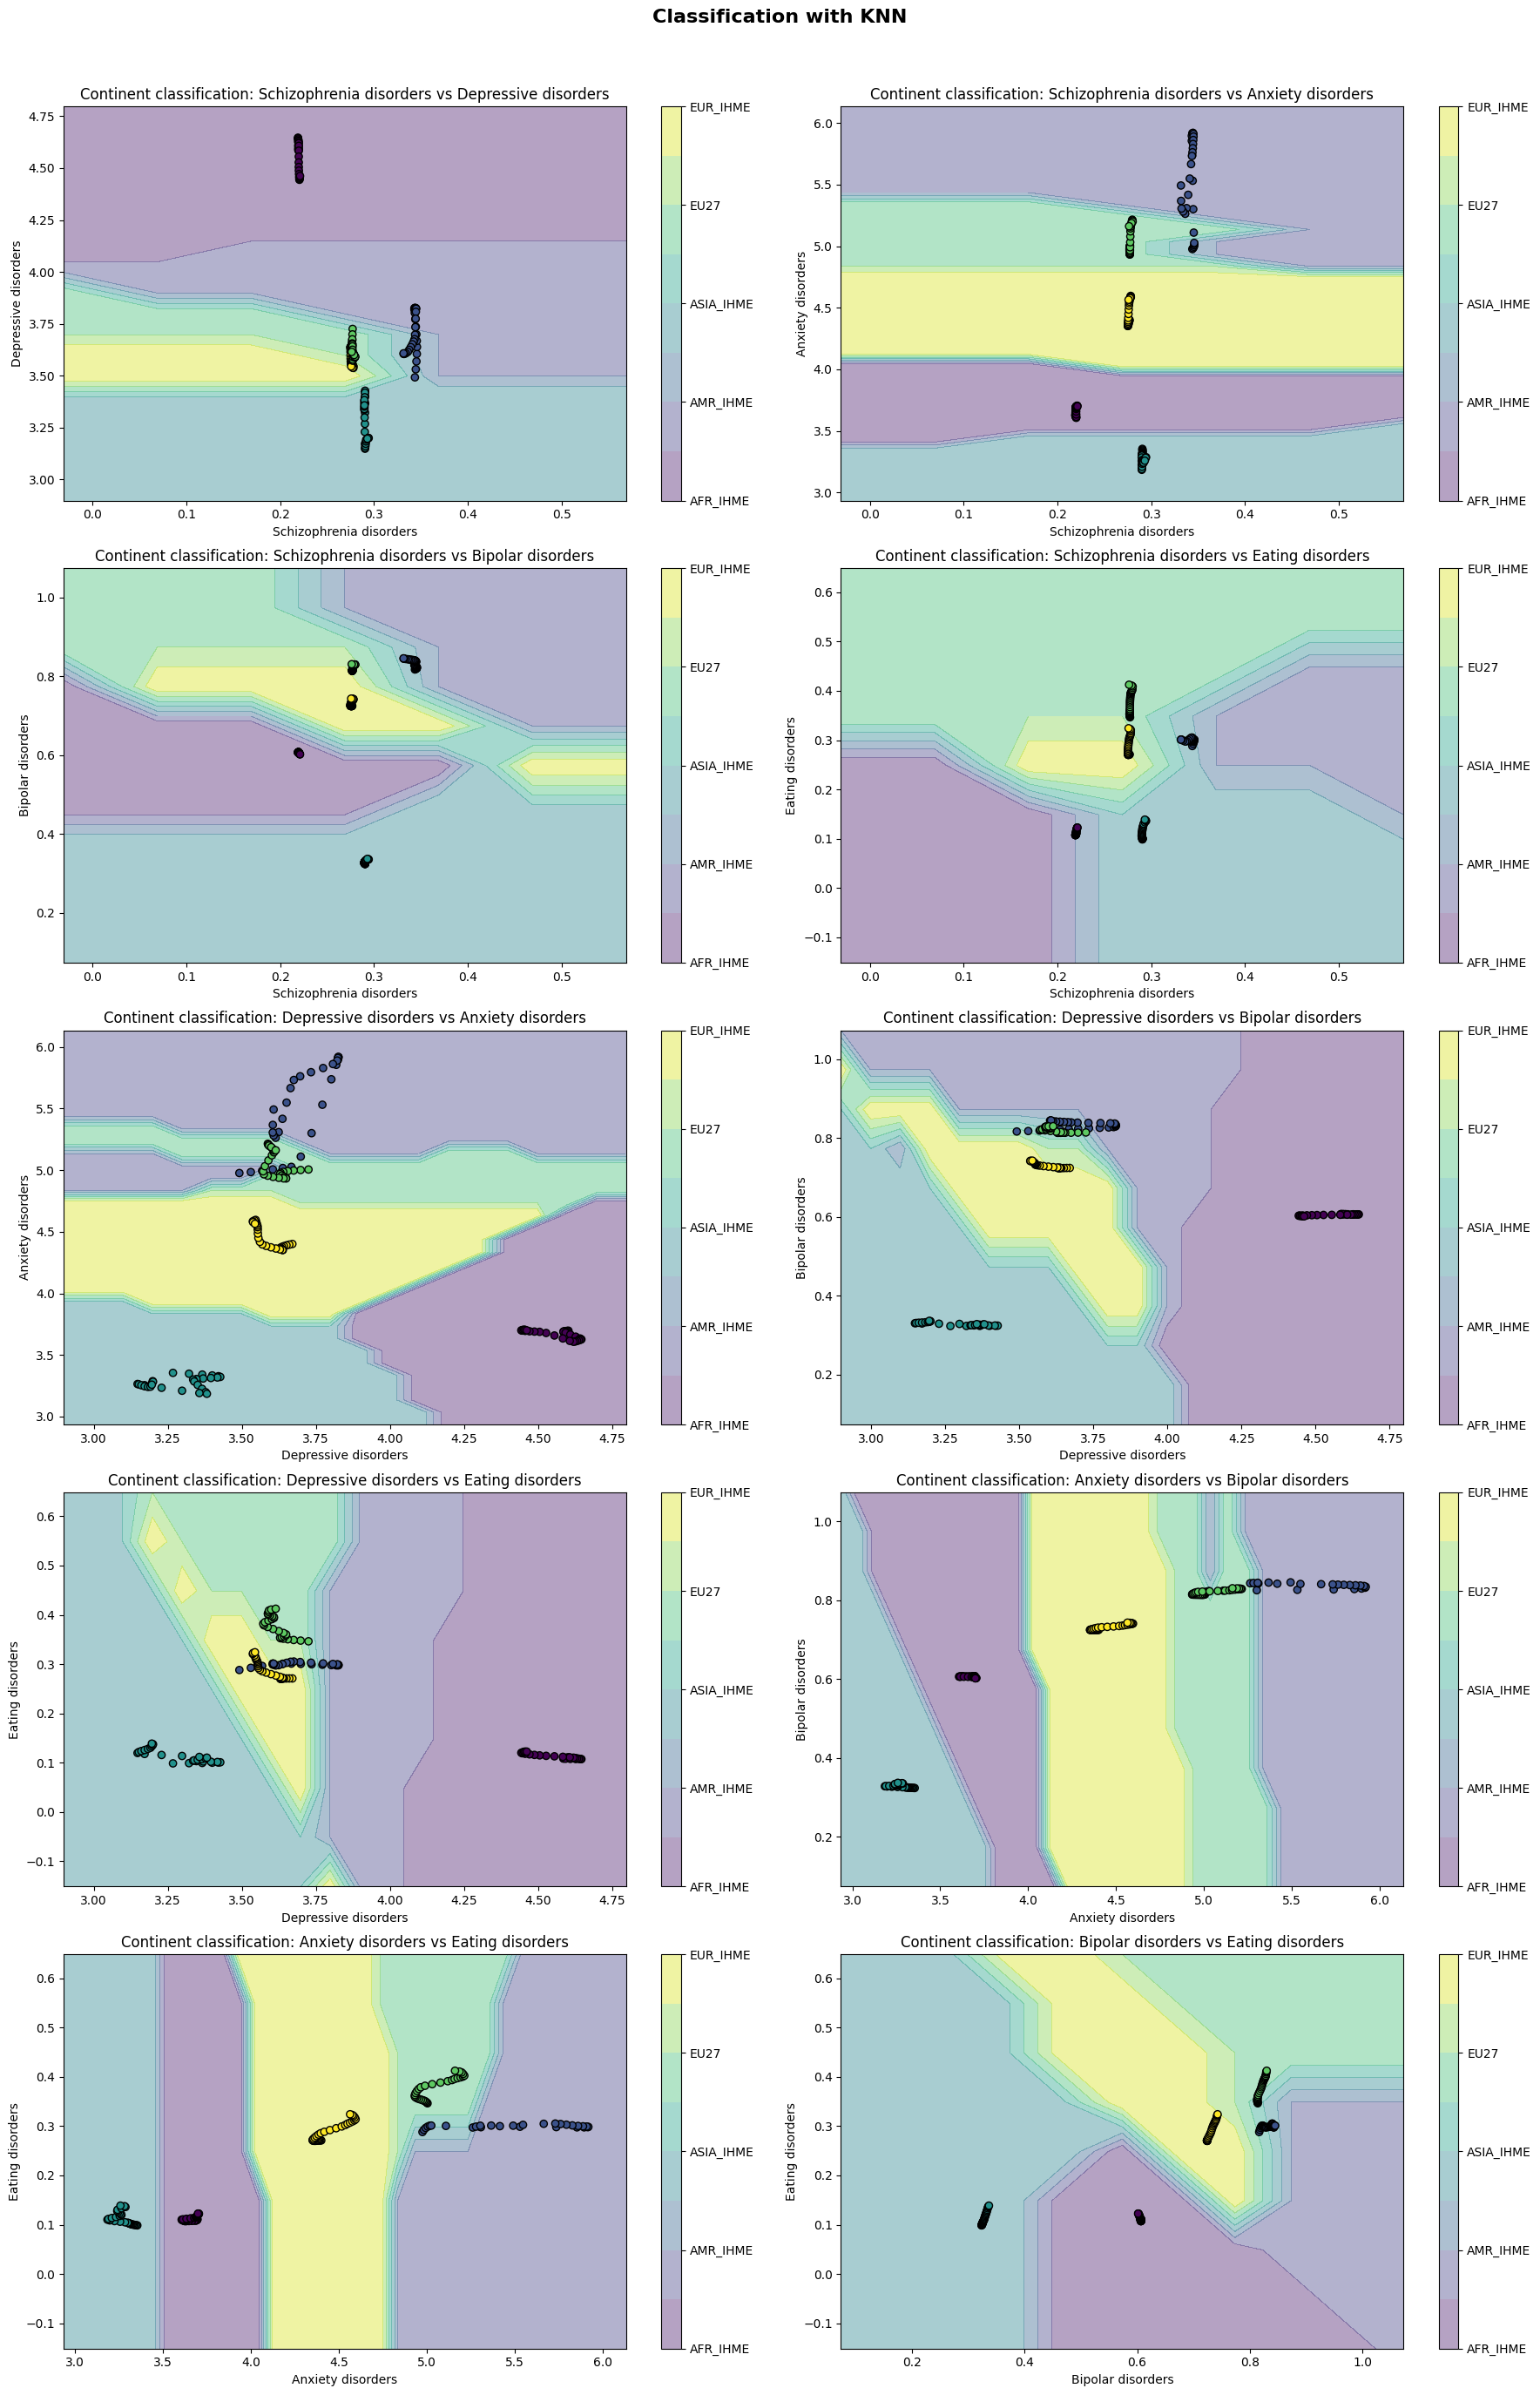

In [120]:
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # KNeighbors Model Training
    model = KNeighborsClassifier(n_neighbors=5) # reasonable value (teacher info)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Continent classification: {disorder1} vs {disorder2}")

    continent_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(continent_codes) - 1, len(continent_codes)))
    cbar.set_ticklabels(continent_codes)

plt.suptitle('Classification with KNN', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

### Perceptron

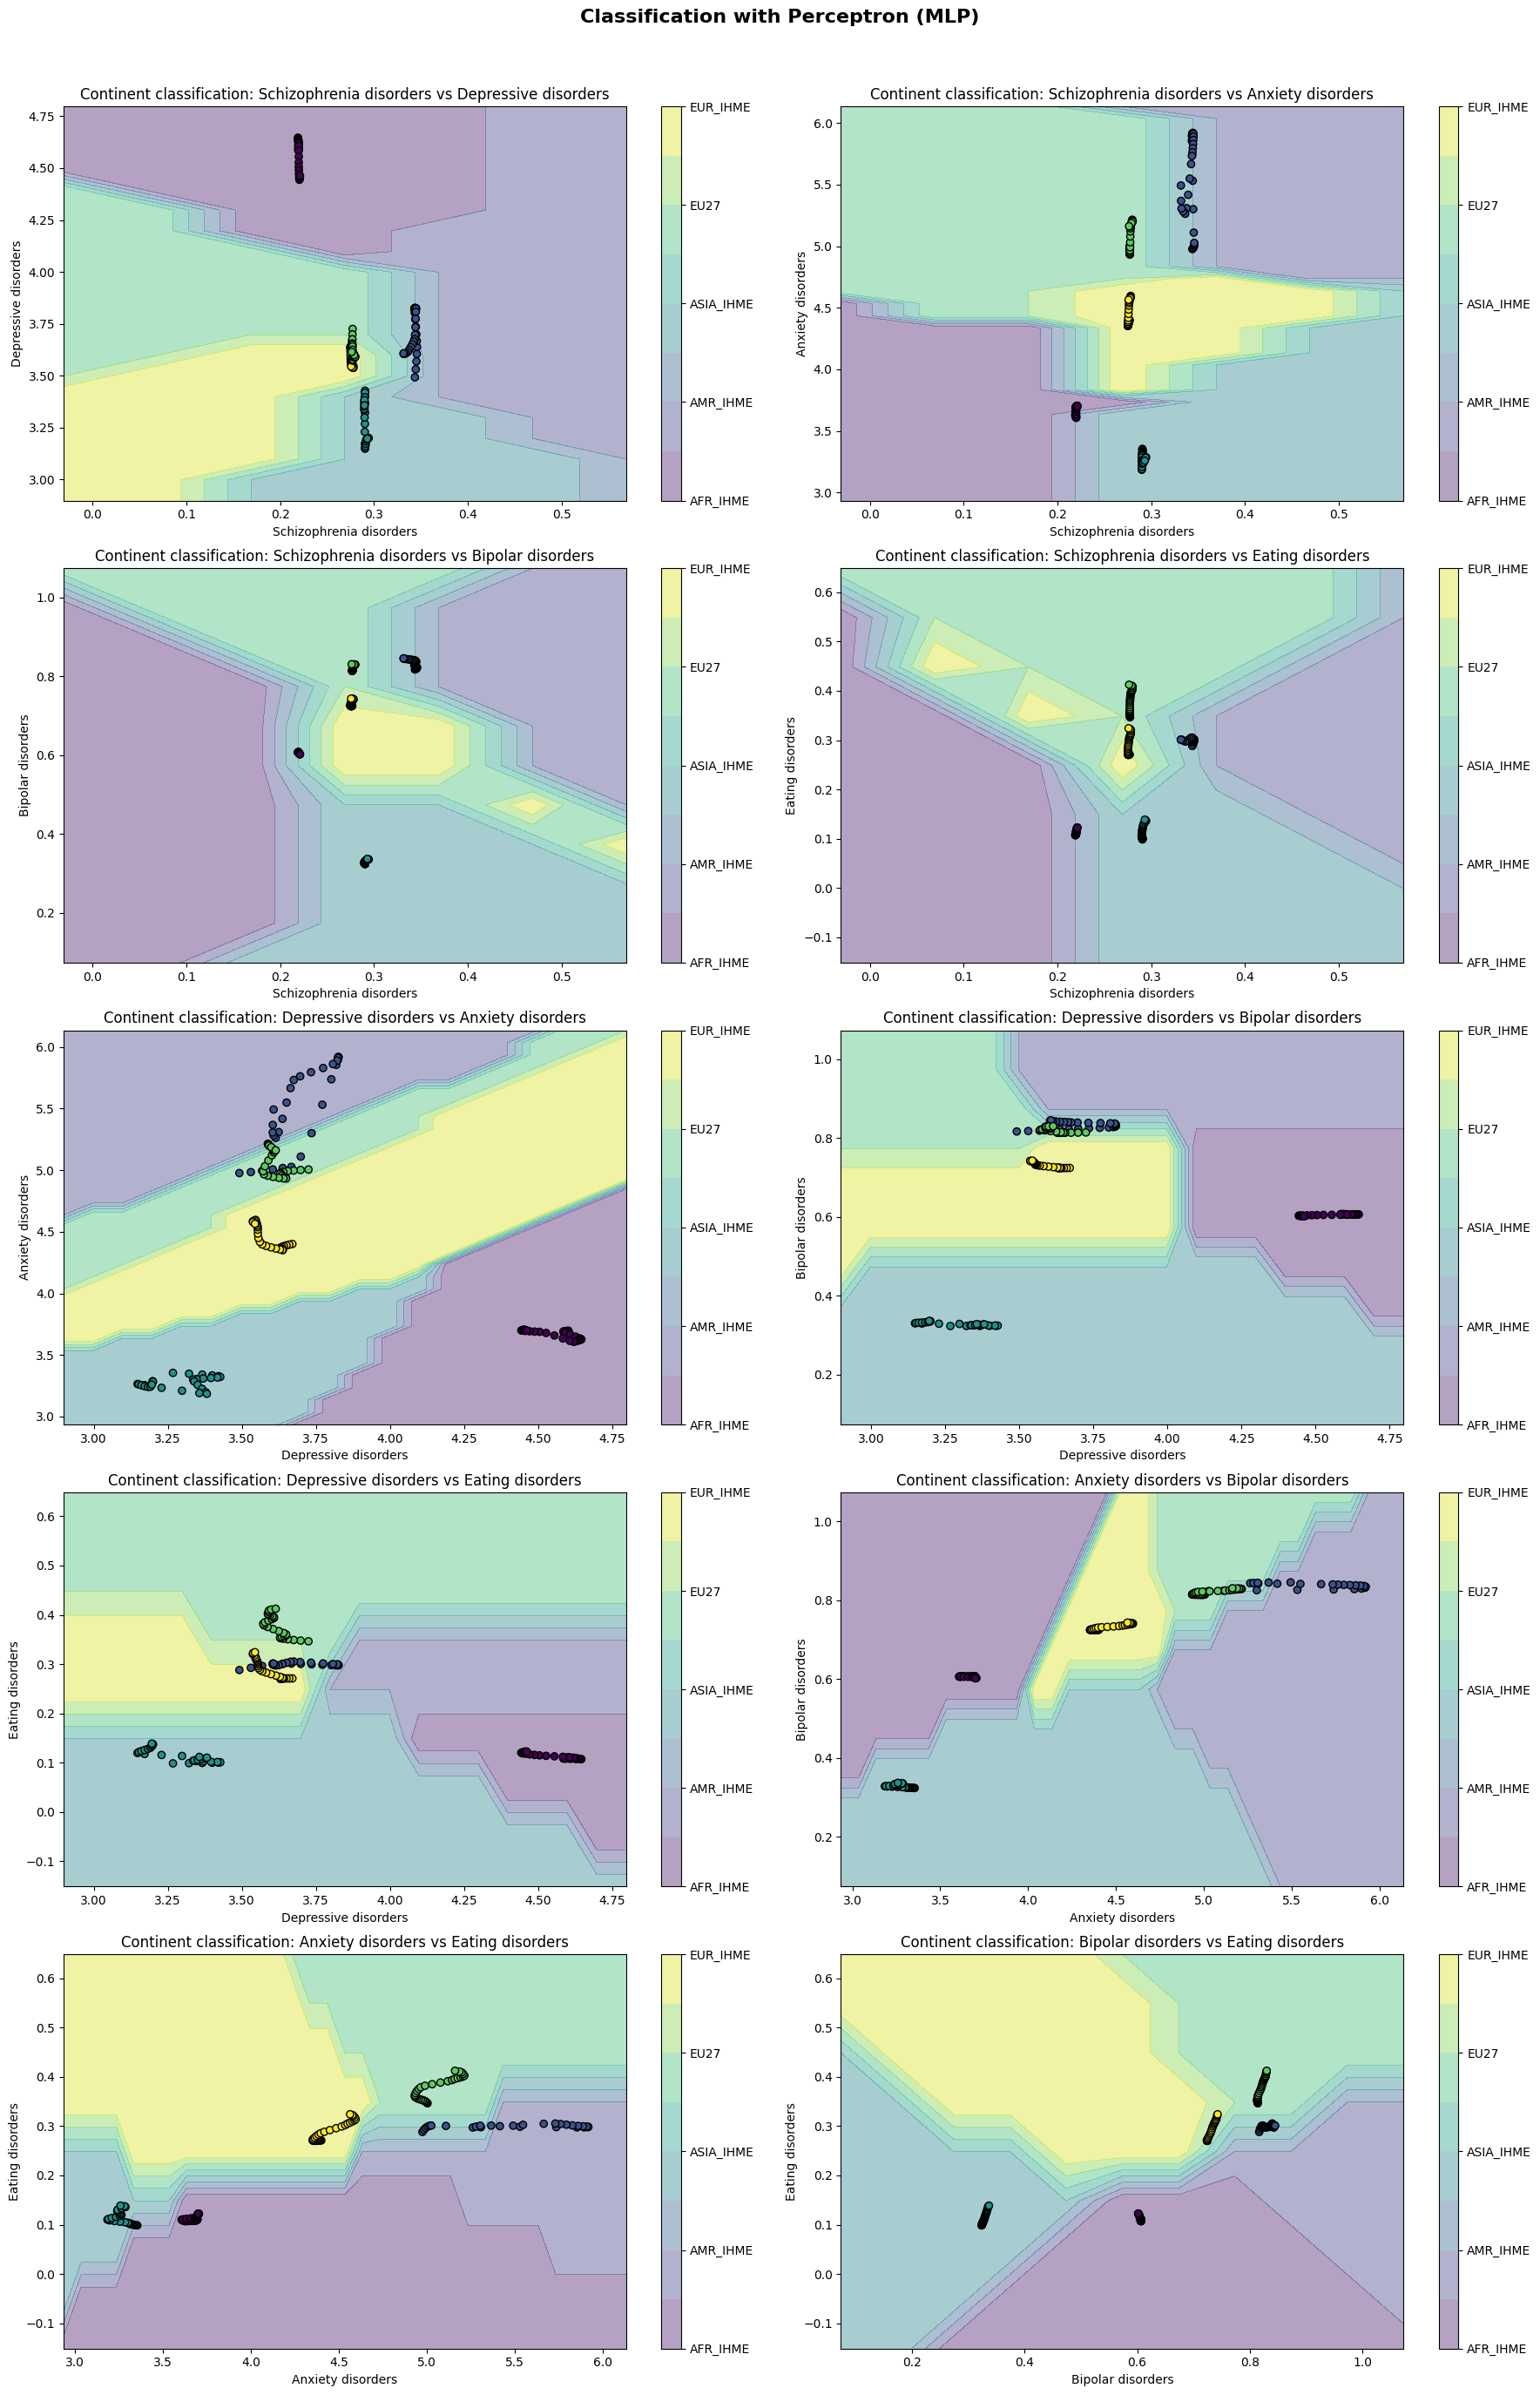

In [136]:
from sklearn.neural_network import MLPClassifier

plt.figure(figsize=(18, 28))

for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    plt.subplot(5, 2, i + 1)

    X = ddbb[[disorder1, disorder2]].values

    # MLP (Perceptron) Model Training
    model = MLPClassifier(max_iter=2000)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contour = plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")
    plt.xlabel(disorder1)
    plt.ylabel(disorder2)
    plt.title(f"Continent classification: {disorder1} vs {disorder2}")

    continent_codes = label_encoder.classes_
    cbar = plt.colorbar(contour)
    cbar.set_ticks(np.linspace(0, len(continent_codes) - 1, len(continent_codes)))
    cbar.set_ticklabels(continent_codes)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="viridis")
    plt.suptitle('Classification with Perceptron (MLP)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


# Classification Algorithm Evaluation

This code evaluates the performance of the five learning models (Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Perceptron) using 3-fold cross-validation on combinations of disorders. It calculates Accuracy and F1 Score for each model in every iteration, prints the results for each fold, and then computes the average performance for each model across all iterations. The final output shows the global average Accuracy and F1 Score for each model, allowing for a comparison of their overall performance.

## Evaluating models based on pairs of mental disorders

### F1 Score Evaluation

In [133]:
import numpy as np
from sklearn.metrics import f1_score
from itertools import combinations
from sklearn.model_selection import KFold

models = {
    "Logistic Regression": LogisticRegression(solver="lbfgs", max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Perceptron": MLPClassifier(max_iter=5000),
}

# Define KFold for cross validation (3 iterations)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# For saving global values of each model
global_results_f1 = {model_name: {"f1_score": []} for model_name in models.keys()}

print("\033[1mF1 Score Evaluation\033[0m")

# Evaluating the models with each combination of disorders (for F1 scores)
for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    print(f"\033[1mEvaluating {disorder1} with {disorder2} for F1 Score:\033[0m")

    # Extract the features corresponding to the disorders
    X = ddbb[[disorder1, disorder2]].values
    f1_global = []

    iteration_index = 1
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        print(f"Iteración {iteration_index}:")
        iteration_index += 1
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate F1 score
            f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
            f1_global.append(f1)

            # Save model results in global dictionary
            global_results_f1[name]["f1_score"].append(f1)

            # Print results for the model
            print(f"  {name}:{f1:.4f}")

    # Print the overall F1 results for this combination of disorders
    print(f"  Promedio global for {disorder1} with {disorder2} F1 Score: {np.mean(f1_global):.4f}\n")

# Print mean F1 scores for each model
for model_name, results in global_results_f1.items():
    avg_f1_score = np.mean(results["f1_score"])
    print(f"{model_name}: Mean F1 Score = {avg_f1_score:.4f}")


F1 Score Evaluation
Evaluating Schizophrenia disorders with Depressive disorders for F1 Score:
Iteración 1:
  Logistic Regression:0.5770
  Decision Tree:1.0000
  Random Forest:1.0000
  Nearest Neighbors:0.7821
  Perceptron:0.7044
Iteración 2:
  Logistic Regression:0.7648
  Decision Tree:0.9672
  Random Forest:1.0000
  Nearest Neighbors:0.9672
  Perceptron:0.8254
Iteración 3:
  Logistic Regression:0.3594
  Decision Tree:1.0000
  Random Forest:1.0000
  Nearest Neighbors:0.8743
  Perceptron:0.8392
Iteración 4:
  Logistic Regression:0.6496
  Decision Tree:1.0000
  Random Forest:1.0000
  Nearest Neighbors:0.8635
  Perceptron:0.7240
Iteración 5:
  Logistic Regression:0.4719
  Decision Tree:0.9333
  Random Forest:0.9004
  Nearest Neighbors:0.7937
  Perceptron:0.7800
  Promedio global for Schizophrenia disorders with Depressive disorders F1 Score: 0.8311

Evaluating Schizophrenia disorders with Anxiety disorders for F1 Score:
Iteración 1:
  Logistic Regression:0.8313
  Decision Tree:1.0000
  R

### Model accuracy

In [134]:
import numpy as np
from sklearn.metrics import accuracy_score
from itertools import combinations

global_results_accuracy = {model_name: {"accuracy": []} for model_name in models.keys()}

# Print Accuracy Evaluation header in bold
print("\033[1mAccuracy Evaluation\033[0m")

# Evaluation of the models with each combination of disorders (for Accuracy scores)
for i, (disorder1, disorder2) in enumerate(combinations_of_disorders):
    print(f"\033[1mEvaluating {disorder1} with {disorder2} for Accuracy:\033[0m")

    X = ddbb[[disorder1, disorder2]].values
    accuracy_global = []

    iteration_index = 1
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        print(f"Iteración {iteration_index}:")
        iteration_index += 1
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate Accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_global.append(accuracy)

            global_results_accuracy[name]["accuracy"].append(accuracy)

            print(f"  {name}:{accuracy:.4f}")

    # Print the overall Accuracy results for this disorder combination
    print(f"  Promedio global for {disorder1} with {disorder2} Accuracy: {np.mean(accuracy_global):.4f}\n")

# Print mean Accuracy scores for each model
for model_name, results in global_results_accuracy.items():
    avg_accuracy = np.mean(results["accuracy"])
    print(f"{model_name}: Mean Accuracy = {avg_accuracy:.4f}")


Accuracy Evaluation
Evaluating Schizophrenia disorders with Depressive disorders for Accuracy:
Iteración 1:
  Logistic Regression:0.6333
  Decision Tree:0.9667
  Random Forest:1.0000
  Nearest Neighbors:0.7667
  Perceptron:0.7667
Iteración 2:
  Logistic Regression:0.8000
  Decision Tree:0.9667
  Random Forest:1.0000
  Nearest Neighbors:0.9667
  Perceptron:0.8333
Iteración 3:
  Logistic Regression:0.4333
  Decision Tree:1.0000
  Random Forest:1.0000
  Nearest Neighbors:0.8667
  Perceptron:0.7333
Iteración 4:
  Logistic Regression:0.7333
  Decision Tree:1.0000
  Random Forest:0.9667
  Nearest Neighbors:0.8667
  Perceptron:0.7000
Iteración 5:
  Logistic Regression:0.5667
  Decision Tree:0.9333
  Random Forest:0.9000
  Nearest Neighbors:0.8000
  Perceptron:0.8000
  Promedio global for Schizophrenia disorders with Depressive disorders Accuracy: 0.8400

Evaluating Schizophrenia disorders with Anxiety disorders for Accuracy:
Iteración 1:
  Logistic Regression:0.8333
  Decision Tree:1.0000
  R